# Ripe & Unripe Tomatoes CLASSIFICATION

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

## Importing Neccessary Libraries

In [1]:
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20656\2356175121.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

### Avoiding ERRORS

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

## Removing Dodgy images

In [4]:
image_exts = ['jpeg','jpg','bmp','png']

In [5]:
image_exts[0]

'jpeg'

In [8]:
os.listdir(data_dir)

['Happy', 'sad']

In [9]:
#### To check all the images in the cat folder

In [152]:
os.listdir(os.path.join(data_dir,'ripe'))

['-bunch-of-red-natural-tomatoes-on-a-branch-in-organic-vegetable-garden-photo.jpg',
 '-bunch-of-red-natural-tomatoes-on-a-branch-in-organic-vegetable-garden-photo2.jpg',
 '-yellow-and-green-organic-cherry-tomatoes-against-a-white-background-2CETWK9.jpg',
 '1000_F_289904951_uGunB0aJjaVjV1sXhEkzoqKPzQMpqgjb.jpg',
 '47154361-group-of-red-fresh-ripe-tomatoes-isolated-on-white-background.jpg',
 '75229.jpg',
 '9b0606d928ac30001c8953c7af5794cc.jpg',
 'DallasFarmersMarket4-1.jpg',
 'four-ripe-red-tomatoes-on-a-branch-vector-21725110.jpg',
 'Growing-Ripe-Red-Tomatoes.jpg',
 'growth-ripe-tomato-22675703.jpg',
 'i-ripe-tomatoes-on-stem-black-and-white6530cbc01ee520.9696977516976967041266.jpg',
 'image15.jpeg',
 'image20.jpeg',
 'image21.jpeg',
 'image23.jpeg',
 'image24.jpeg',
 'image25.jpeg',
 'image27.jpeg',
 'image29.jpeg',
 'image30.jpeg',
 'image32.jpeg',
 'images.jpg',
 'images107.jpg',
 'images11.jpg',
 'images110.jpg',
 'images111.jpg',
 'images112.jpg',
 'images115.jpg',
 'images117.jpg

In [153]:
os.listdir(os.path.join(data_dir,'unripe'))

['221.png',
 'DSC-4381-1537368899.jpg',
 'green-4329019_1280-e1565642603574.jpg',
 'green-tomato-grown-in-a-greenhouse-close-up-view-green-leaves-around-2AJYX5D.jpg',
 'green-tomatoes-1.jpg.webp',
 'green-tomatoes-by-Stofko-800x491.jpg',
 'Green-Tomatoes.jpg',
 'green-unripe-tomato-on-a-white-background-vector-22354663.jpg',
 'hanging-green-unripe-tomatoes-on-a-tomato-plant-in-summer-2D34NTF.jpg',
 'HETMQHHP4MI6XANSTNYGDJMC3A.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image18.jpeg',
 'image26.jpeg',
 'image30.jpeg',
 'images10.jpg',
 'images102.jpg',
 'images103.jpg',
 'images105.jpg',
 'images106.jpg',
 'images107.jpg',
 'images110.jpg',
 'images116.jpg',
 'images119.jpg',
 'images123.jpg',
 'images126.jpg',
 'images129.jpg',
 'images133.jpg',
 'images134.jpg',
 'images137.jpg',
 'images139.jpg',
 'images14.jpg',
 'images142.jpg',
 'images144.jpg',
 'images146.jpg',
 'images148.jpg',
 'images151.jpg',
 'images153.jpg',
 'images154.jpg',
 'images155.jpg

In [154]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Tomatoes\Image\ripe\usda-tomato-ripeness-color-chart.gif
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Tomatoes\Image\unripe\green-tomatoes-1.jpg.webp


In [14]:
tf.data.Dataset??

## Loading Datasets

In [150]:
data_dir = r'C:\Users\ADMIN\Documents\ComputerVision_Projects\Tomatoes\Image'


In [158]:
#Building Data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)#,shuffle=True)

Found 217 files belonging to 2 classes.


In [159]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [160]:
 #Building Data pipeline
data_iterator = data.as_numpy_iterator()

In [161]:
# Acessing Datapipeline
batch = data_iterator.next()
len(batch)

2

In [162]:
batch[0].shape

(32, 256, 256, 3)

In [163]:
#Class 1 = unripe
#Class 0 = ripe
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [164]:
# Convert the features array into a DataFrame
df_features = pd.DataFrame(batch[1])
print(df_features)

    0
0   0
1   0
2   0
3   1
4   0
5   1
6   0
7   0
8   1
9   1
10  1
11  0
12  0
13  1
14  0
15  0
16  1
17  0
18  1
19  1
20  1
21  0
22  0
23  0
24  1
25  0
26  1
27  0
28  1
29  1
30  0
31  0


## Visualizing dataset

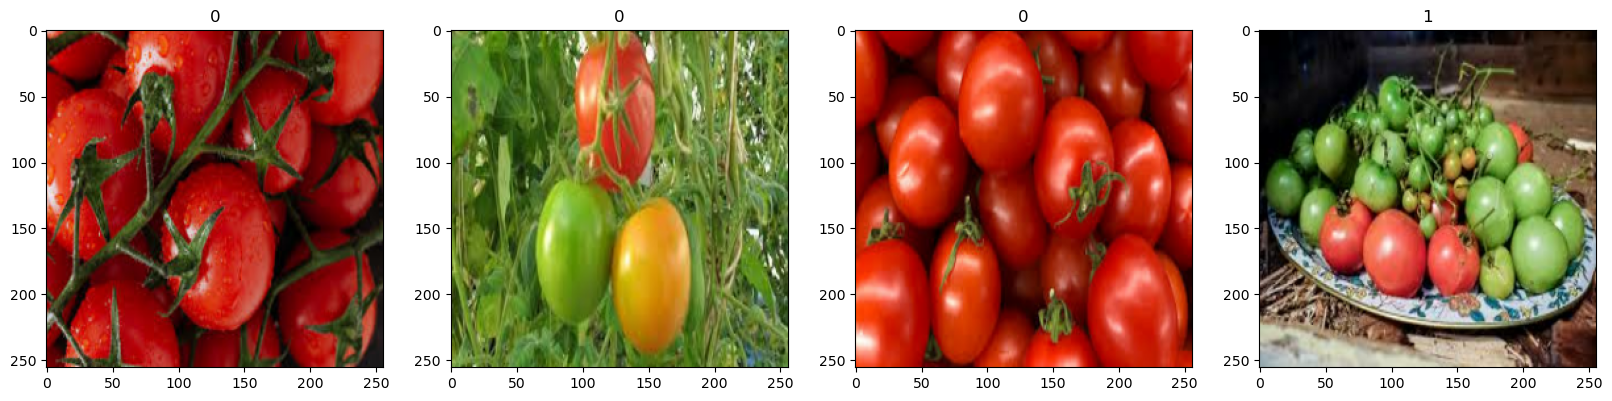

In [165]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

### Scale Data

In [166]:
data = data.map(lambda x, y: (x / 255.0, y))  # Scale images to [0, 1]

In [167]:
data.as_numpy_iterator().next()[0].min()

0.0

### Split Data

In [168]:
len(data)

7

In [173]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [174]:
train_size

4

In [175]:
val_size

2

In [176]:
test_size

1

In [177]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building Our Models

## CNN  model

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import torch
import torchvision

In [184]:
# We Instantiate the Sequential model
NN_model_1 = Sequential()

# Add the layers as defined
NN_model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
NN_model_1.add(MaxPooling2D())
#NN_model_1.add(Dropout(0.25))

NN_model_1.add(Conv2D(32, (3, 3), activation='relu'))
NN_model_1.add(MaxPooling2D())
#NN_model_1.add(Dropout(0.25))

NN_model_1.add(Conv2D(16, (3, 3), activation='relu'))
NN_model_1.add(MaxPooling2D())
#NN_model_1.add(Dropout(0.25))

NN_model_1.add(Flatten())
   
NN_model_1.add(Dense(256, activation='relu'))
#NN_model_1.add(Dropout(0.5))
NN_model_1.add(Dense(1, activation='sigmoid'))



In [185]:
# Compile the model
NN_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
NN_model_1.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 16)      

In [186]:
logdir = 'logs'

In [187]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [188]:
# Train the model with the profiler callback
history_1 = NN_model_1.fit(train, epochs=30, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
4/4 [==============================] - 12s 2s/step - loss: 0.8809 - accuracy: 0.5547 - val_loss: 0.6391 - val_accuracy: 0.7812
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 0.6381 - accuracy: 0.6172 - val_loss: 0.4972 - val_accuracy: 0.7188
Epoch 3/30
4/4 [==============================] - 10s 2s/step - loss: 0.4935 - accuracy: 0.8047 - val_loss: 0.3284 - val_accuracy: 0.9375
Epoch 4/30
4/4 [==============================] - 9s 2s/step - loss: 0.4465 - accuracy: 0.8516 - val_loss: 0.3425 - val_accuracy: 0.8438
Epoch 5/30
4/4 [==============================] - 10s 2s/step - loss: 0.3472 - accuracy: 0.8906 - val_loss: 0.2189 - val_accuracy: 0.9062
Epoch 6/30
4/4 [==============================] - 9s 2s/step - loss: 0.3208 - accuracy: 0.8594 - val_loss: 0.2899 - val_accuracy: 0.8438
Epoch 7/30
4/4 [==============================] - 10s 2s/step - loss: 0.2273 - accuracy: 0.8906 - val_loss: 0.2262 - val_accuracy: 0.8906
Epoch 8/30
4/4 [=====================

### Plot Performance

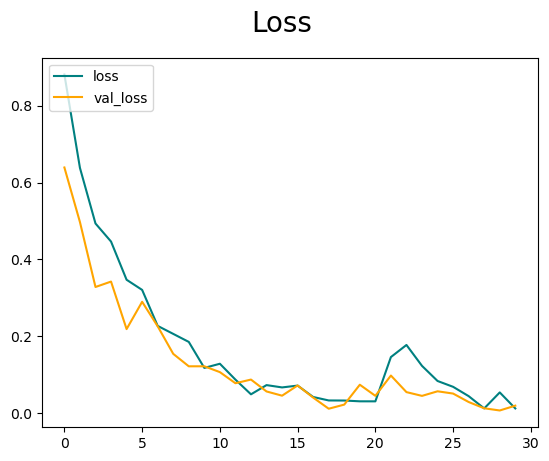

In [189]:
fig = plt.figure()
plt.plot(history_1.history['loss'], color='teal', label='loss')
plt.plot(history_1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

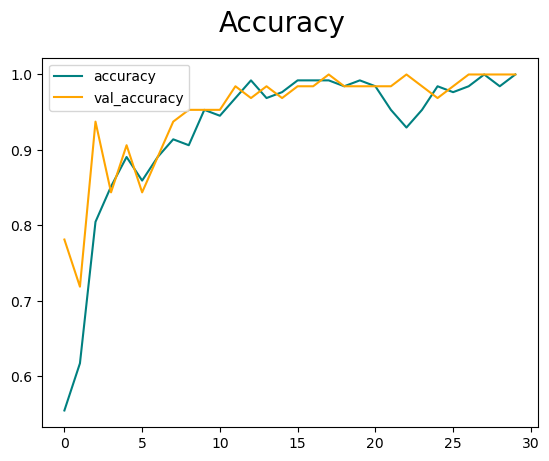

In [190]:
fig = plt.figure()
plt.plot(history_1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate Performance

### Evaluate

In [191]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [192]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [193]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = NN_model_1.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 692ms/step


In [194]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [195]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy: 1.0


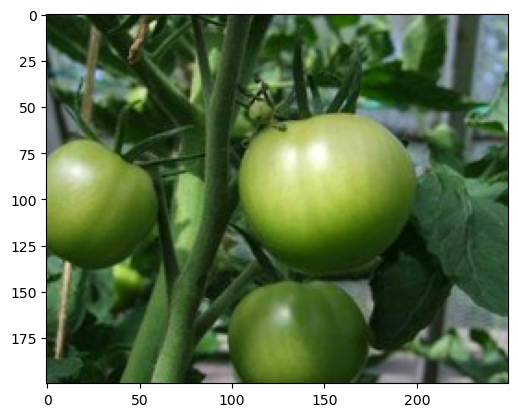

In [230]:
import cv2
import matplotlib.pyplot as plt

try:
    img = cv2.imread(r'C:\Users\ADMIN\Downloads\Riped_tomato_121.jpeg')
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("Failed to read the image file.")
except Exception as e:
    print("An error occurred:", str(e))


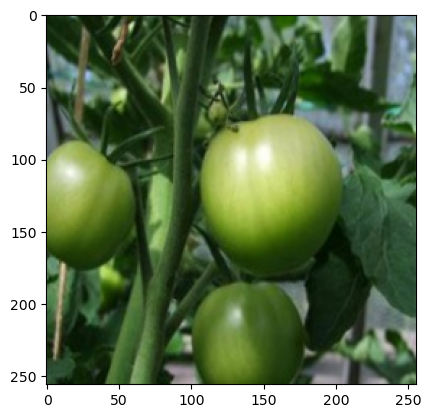

In [231]:
# Resize the image using TensorFlow
resize = tf.image.resize(img, (256, 256))

# Convert the image to uint8 data type
resize_uint8 = tf.cast(resize, tf.uint8)

# Convert the color from BGR to RGB using OpenCV
resized = cv2.cvtColor(resize_uint8.numpy(), cv2.COLOR_BGR2RGB)

# Display the resized and converted image
plt.imshow(resized)
plt.show()

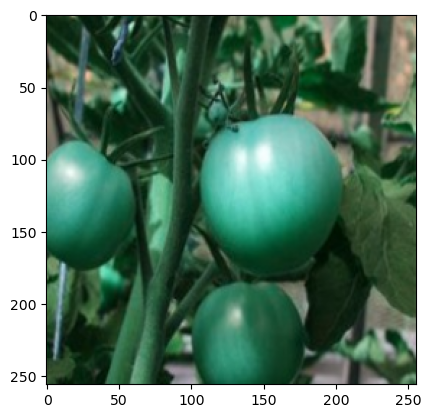

In [232]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [233]:
resize.shape

TensorShape([256, 256, 3])

In [234]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [235]:
yhat_1 = NN_model_1.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 229ms/step


In [236]:
yhat_1

array([[0.9820552]], dtype=float32)

In [237]:
if yhat_1 > 0.5: 
    print(f'Predicted class is Unripe')
else:
    print(f'Predicted class is Ripe')

Predicted class is Unripe


-- This predicted accurately

In [245]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test data generator
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = NN_model_1.predict(X)
    
    # Convert probabilities to binary predictions
    y_pred_binary = np.round(yhat).astype(int)
    
    # Flatten the arrays to handle multiple batches
    true_labels.extend(y.flatten())
    predicted_labels.extend(y_pred_binary.flatten())

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 1s 676ms/step
Confusion Matrix:
[[ 7  0]
 [ 0 18]]


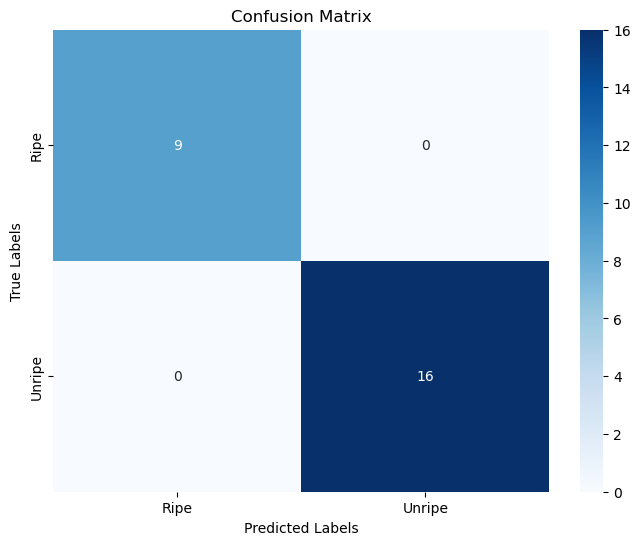

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ["Ripe", "Unripe"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Saving our model

In [82]:
import joblib

In [238]:
# Save the stacking model to a file
model_filename = 'tomatoes_CNN.pkl'
joblib.dump(NN_model_1, model_filename)
print(f"CNN model saved as '{model_filename}'")


CNN model saved as 'tomatoes_CNN.pkl'
